In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv("../input/train_1.csv",index_col=0)
data_cols=[u for u in train.columns if u.startswith('201')]
train=train[data_cols[:]]

In [3]:
weekends=(pd.Series(data_cols).astype('datetime64[ns]').dt.dayofweek // 5 == 1).values

In [4]:
val=train.values

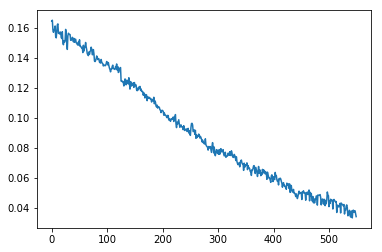

In [5]:
plt.plot((train.fillna(0)==0).values.mean(0))

In [6]:
def naorzero(X):
    return ((X==0)+np.isnan(X))>0

# weekend

In [7]:
N=49
M=12
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    wa=weekends[i:i+N]
    a=a[:,wa]
    b=val[:,i+N+M:i+N+M+60]
    wb=weekends[i+N+M:i+N+M+60]
    b=b[:,wb]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [8]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [9]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
424  424        0.751162       0.009885        0.185287     0.040076
425  425        0.759311       0.009830        0.186252     0.040076
426  426        0.757776       0.009830        0.186418     0.039959
427  427        0.756574       0.009830        0.187710     0.039621
428  428        0.756574       0.009830        0.187710     0.039621

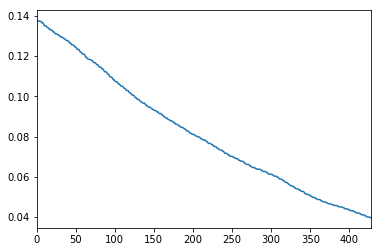

In [10]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [11]:
N=14
M=12
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    wa=weekends[i:i+N]
    a=a[:,wa]
    b=val[:,i+N+M:i+N+M+60]
    wb=weekends[i+N+M:i+N+M+60]
    b=b[:,wb]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [12]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [13]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
459  459        0.706112       0.008321        0.146603     0.040076
460  460        0.715531       0.008128        0.145112     0.040076
461  461        0.713616       0.008128        0.145146     0.039959
462  462        0.713104       0.008128        0.146279     0.039621
463  463        0.713104       0.008128        0.146279     0.039621

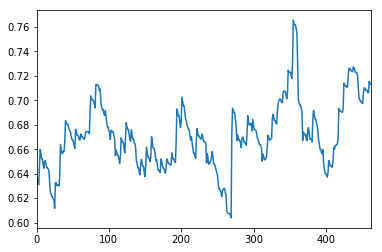

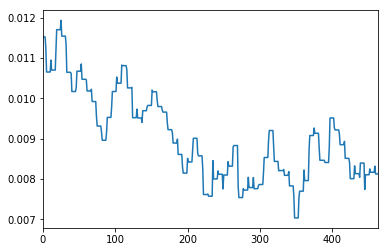

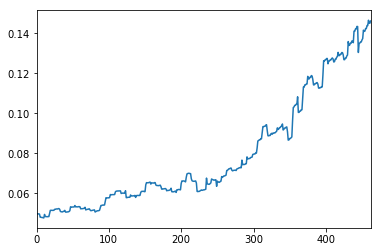

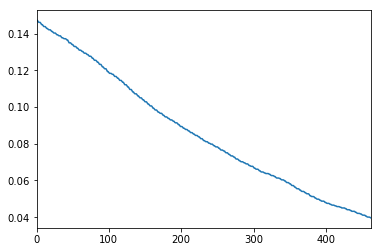

In [14]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

# non-weekend

In [15]:
N=49
M=12
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    wa= ~weekends[i:i+N]
    a=a[:,wa]
    b=val[:,i+N+M:i+N+M+60]
    wb= ~weekends[i+N+M:i+N+M+60]
    b=b[:,wb]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [16]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [17]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
424  424        0.761798       0.010788        0.192600     0.042672
425  425        0.760764       0.010788        0.193391     0.042440
426  426        0.759302       0.010754        0.192864     0.042338
427  427        0.759555       0.010740        0.193118     0.042242
428  428        0.762223       0.010664        0.193426     0.042024

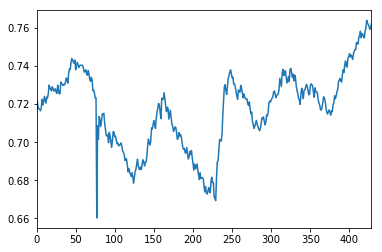

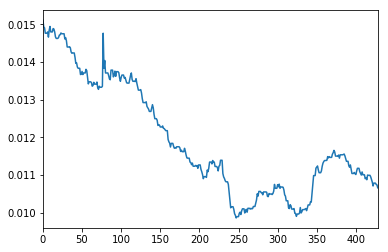

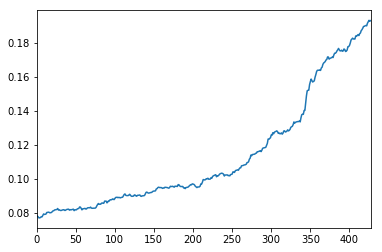

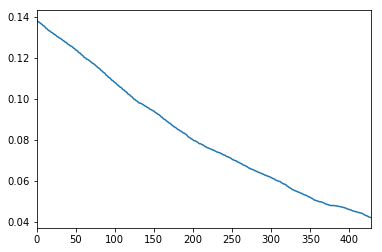

In [18]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [19]:
N=14
M=12
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    wa= ~weekends[i:i+N]
    a=a[:,wa]
    b=val[:,i+N+M:i+N+M+60]
    wb= ~weekends[i+N+M:i+N+M+60]
    b=b[:,wb]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [20]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [21]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
459  459        0.734156       0.009499        0.163433     0.042672
460  460        0.732894       0.009499        0.164045     0.042440
461  461        0.744220       0.009486        0.166737     0.042338
462  462        0.743793       0.009389        0.165320     0.042242
463  463        0.752471       0.009637        0.172560     0.042024

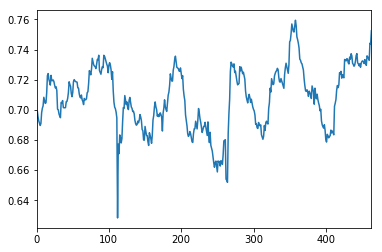

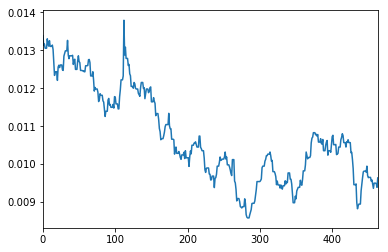

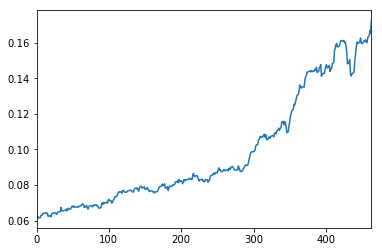

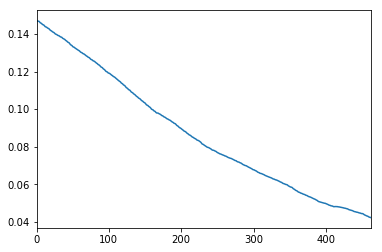

In [22]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

# median

In [23]:
N=49
M=12
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [24]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [25]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
424  424        0.765389       0.010968        0.200380     0.041893
425  425        0.765661       0.010857        0.199208     0.041730
426  426        0.764506       0.010899        0.199983     0.041664
427  427        0.765850       0.010830        0.199647     0.041543
428  428        0.767421       0.010816        0.200573     0.041384

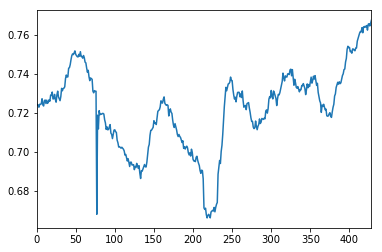

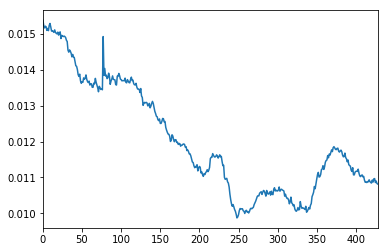

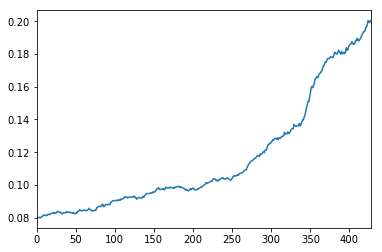

In [26]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [27]:
N=14
M=12
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [28]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [29]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
459  459        0.743693       0.009892        0.175609     0.041893
460  460        0.745699       0.009858        0.176153     0.041730
461  461        0.748962       0.009961        0.179064     0.041664
462  462        0.750550       0.009810        0.177226     0.041543
463  463        0.759741       0.009954        0.182746     0.041384

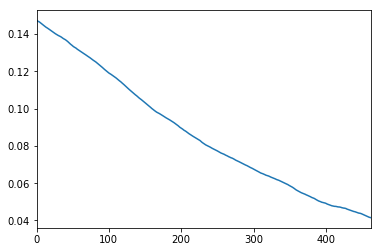

In [30]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

# mean

In [34]:
N=49
M=12
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmean(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [35]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
424  424        0.837391       0.006852        0.136967     0.041893
425  425        0.838794       0.006838        0.137454     0.041730
426  426        0.836799       0.006797        0.136515     0.041664
427  427        0.834141       0.006825        0.137030     0.041543
428  428        0.835268       0.006769        0.136632     0.041384

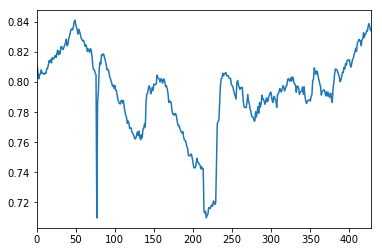

In [36]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()